In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
#用 Embedding 层和 SimpleRNN 层来训练模型
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6451 - acc: 0.6080 - val_loss: 0.4792 - val_acc: 0.7918
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4003 - acc: 0.8322 - val_loss: 0.4645 - val_acc: 0.7756
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2968 - acc: 0.8812 - val_loss: 0.4478 - val_acc: 0.7938
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2257 - acc: 0.9134 - val_loss: 0.4555 - val_acc: 0.8074
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1472 - acc: 0.9475 - val_loss: 0.5141 - val_acc: 0.8104
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0956 - acc: 0.9688 - val_loss: 0.4206 - val_acc: 0.8492
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0561 - acc: 0.9833 - val_loss: 0.5782 - val_acc:

In [7]:
# #使用 Keras 中的 LSTM 层http://localhost:8888/notebooks/%E6%96%87%E6%A1%A3/deeplearn/%E7%AC%AC%E5%85%AD%E7%AB%A0/%E5%BE%AA%E7%8E%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/%E6%9C%AA%E5%91%BD%E5%90%8D.ipynb?kernel_name=python3#
# from keras.layers import LSTM
# model = Sequential()
# model.add(Embedding(max_features, 32))
# model.add(LSTM(32))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',
# loss='binary_crossentropy',
# metrics=['acc'])
# history = model.fit(input_train, y_train,
# epochs=10,
# batch_size=128,
# validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.5083 - acc: 0.7615 - val_loss: 0.3282 - val_acc: 0.8650
Epoch 2/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2929 - acc: 0.8840 - val_loss: 0.3779 - val_acc: 0.8246
Epoch 3/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2337 - acc: 0.9099 - val_loss: 0.3284 - val_acc: 0.8836
Epoch 4/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1983 - acc: 0.9267 - val_loss: 0.3251 - val_acc: 0.8730
Epoch 5/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1740 - acc: 0.9361 - val_loss: 0.2996 - val_acc: 0.8896
Epoch 6/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1548 - acc: 0.9429 - val_loss: 0.4161 - val_acc: 0.8678
Epoch 7/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1424 - acc: 0.9499 - val_loss: 0.5598 - val_acc:

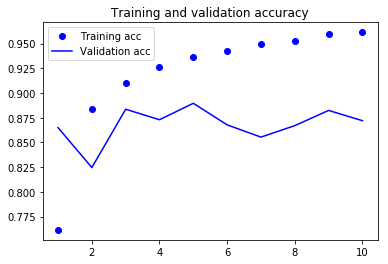

In [8]:
#绘制结果
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

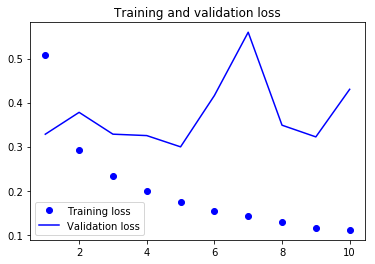

In [9]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()